# Implementation of the Nueral Style Algorithm which performs the deconvolution

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import matplotlib.pyplot as plt

from keras.applications.vgg19 import VGG19, preprocess_input
from src.deconv import Deconv
from scipy.misc import imread

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [7]:
a_content = '../images/2style2style/A1.png'
b_style_ref = '../images/2style2style/BP1.png'

In [8]:
model = Deconv(VGG19, preprocess_input,
               path_A=a_content,
               path_B=b_style_ref)

In [5]:
combined_img = model.deconv(
    output_layer='block5_conv1',
    save_images=False,
    iterations=10,
    noise_ratio=0.0,
    content_weight=0.025,
    style_weight=1.0,
    total_variation_weight=1.0,
    testing=True)

100%|██████████| 10/10 [07:24<00:00, 48.49s/it]


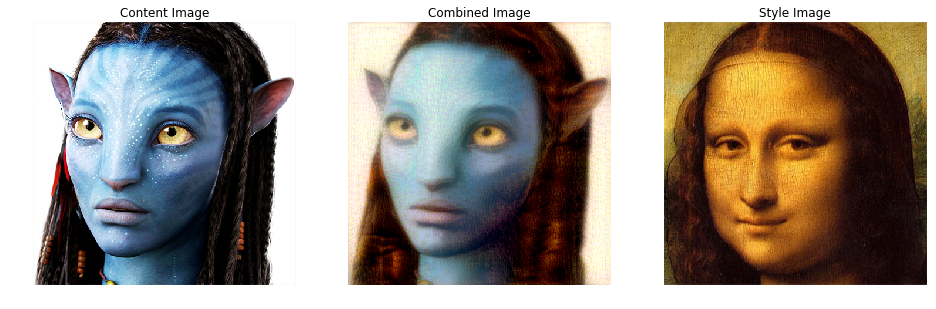

In [6]:
from matplotlib.image import imread

f, axarr = plt.subplots(1,3, figsize=(16, 30))
axarr[0].imshow(imread(a_content))
axarr[0].axis('off')
axarr[0].set_title("Content Image")
axarr[1].imshow(combined_img)
axarr[1].axis('off')
axarr[1].set_title("Combined Image")
axarr[2].imshow(imread(b_style_ref))
axarr[2].axis('off')
axarr[2].set_title("Style Image")